# **connect to drive**

In [100]:
from google.colab import drive

drivePath = '/content/drive'

drive.mount(drivePath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#library

In [101]:
%reload_ext rpy2.ipython

In [102]:
%%R
lib_loc <- "/content/drive/MyDrive/Colab_Notebooks/r_lib" #library location


In [103]:
!apt-get update
!apt-get install r-cran-tmvtnorm

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic

In [104]:
%%R
library(DEP, lib=lib_loc)
library("dplyr")
library(gridExtra,lib=lib_loc)
library(fdrtool,lib=lib_loc)
library(ggrepel,lib=lib_loc)

#widgets

In [105]:
import ipywidgets as widgets

#generate_checkbox(description, id)
def generate_checkbox(description, id):
  check_box = widgets.Checkbox(
        value=False, 
        description=description,
        disabled=False, 
        indent=False, 
  )
  def on_checkbox_change(change):
    
    if(check_box.value):
        experimental_design.at[id, 'state'] = "True"
        experimental_design.at[id, 'label'] = df_colname_py[id-1]
    else :
        experimental_design.at[id, 'state'] = "False"
    #print(check_box.value)
  display(check_box)
  check_box.observe(on_checkbox_change, names="value")


In [106]:
#text
def generate_text(id, placeholder):

  text = widgets.Text(
      value='',
      #placeholder=placeholder,
      description=placeholder,
      disabled=False,
      layout = widgets.Layout(height="30px", width="35%")
  )
  def on_text_change(change):
    experimental_design.at[id, placeholder] = text.value
    #print(experimental_design)

  display(text)
  text.observe(on_text_change, names="value")


In [107]:
def generate_button(count,description):
  button = widgets.Button(description=description)
  output = widgets.Output()
  display(button, output)
  def on_button_clicked(b):
      with output:
          if(count):
            print("save to experimental_design.csv")
            
            temp = experimental_design[(experimental_design.state != "False")]
            temp = temp.drop("state", axis=1)
            temp.to_csv("experimental_design.csv", index=False)
          else :
              temp = experimental_design[(experimental_design.state != "False")]
              print(temp)
              generate_button(1,"check again")
  button.on_click(on_button_clicked)

#選擇檔案

In [108]:
#上傳檔案到colab
from google.colab import files
from rpy2.robjects import r
import rpy2.robjects as robjects

file=files.upload()

if (file):
  filename = next(iter(file))
  if (filename.count(".txt") | filename.count(".csv")): #可以接受檔名為 .txt 與 .csv 的檔案
    r = robjects.r
    r.assign('filename', filename) #將檔案名稱python -> R
  else :
    print("請再次執行此儲存格，並選擇.csv或.txt檔")
else:
  print("請再次執行此儲存格，並選擇一個檔案")

Saving proteinGroups_HsinYuan_Rat.txt to proteinGroups_HsinYuan_Rat (2).txt


#DEP data

In [86]:
%%R
# Loading a package required for data handling
library("dplyr")
library(stringr)

# The data is provided with the package
file_type <- str_extract_all(filename,'\\b(.txt|.csv)\\b') #確認檔案為csv還是txt
if (file_type == ".csv"){
  data <- read.csv(file = filename, header=TRUE  ,fileEncoding ="UTF-8")  
}
else {
   data <- read.csv(file = filename, header=TRUE ,sep="\t" ,fileEncoding ="UTF-8") 
}

cat("file's row  column =", dim(data), "\n")
#cat("**colnames: \n")
#print(colnames(data))

if ( "Reverse" %in% names(data) ){
  data <- filter(data, Reverse != "+")  
}
if ( "Potential.contaminant" %in% names(data) ){
  data <- filter(data, Potential.contaminant != "+") 
}
# We filter for contaminant proteins and decoy database hits, which are indicated by "+" in the columns "Potential.contaminants" and "Reverse", respectively. 

#print(head(data))

file's row  column = 2291 122 


In [87]:
%%R
df <- data[ , grepl( "Reporter.intensity.corrected" , names( data) )] 
conditionColumn <- colnames(df)
print(conditionColumn)
condition <- gsub("Reporter.intensity.corrected.[0-9]+.", "", conditionColumn)
condition <- unique(condition)
print(condition)

numCondition <- length(condition)
print(numCondition)


 [1] "Reporter.intensity.corrected.1.AGE"  "Reporter.intensity.corrected.2.AGE" 
 [3] "Reporter.intensity.corrected.3.AGE"  "Reporter.intensity.corrected.4.AGE" 
 [5] "Reporter.intensity.corrected.5.AGE"  "Reporter.intensity.corrected.6.AGE" 
 [7] "Reporter.intensity.corrected.7.AGE"  "Reporter.intensity.corrected.8.AGE" 
 [9] "Reporter.intensity.corrected.9.AGE"  "Reporter.intensity.corrected.10.AGE"
[11] "Reporter.intensity.corrected.11.AGE" "Reporter.intensity.corrected.1.FPS" 
[13] "Reporter.intensity.corrected.2.FPS"  "Reporter.intensity.corrected.3.FPS" 
[15] "Reporter.intensity.corrected.4.FPS"  "Reporter.intensity.corrected.5.FPS" 
[17] "Reporter.intensity.corrected.6.FPS"  "Reporter.intensity.corrected.7.FPS" 
[19] "Reporter.intensity.corrected.8.FPS"  "Reporter.intensity.corrected.9.FPS" 
[21] "Reporter.intensity.corrected.10.FPS" "Reporter.intensity.corrected.11.FPS"
[1] "AGE" "FPS"
[1] 2


In [88]:
import ipywidgets as widgets

numCondition_py = robjects.r("numCondition")
condition_py = robjects.r("condition")

radiobuttonCondition = widgets.RadioButtons(
    options= condition_py,
    description='condition:',
    disabled=False
)
def on_radiobuttonCondition_change(change):
    r.assign("conditionName", change.new)
    
r.assign("conditionName", condition_py[0])
display(radiobuttonCondition)
radiobuttonCondition.observe(on_radiobuttonCondition_change, names="value")

RadioButtons(description='condition:', options=('AGE', 'FPS'), value='AGE')

In [89]:
%%R
cat("condition: ", conditionName)

df <- data[ , grepl( "Reporter.intensity.corrected" , names( data) )]
df <- df[, grepl(conditionName, names(df))]

df = log2(df)
colname <- colnames(df)
numColname <- length(colname)

draw_hist <- function(id) {
  hist(x=df[,id], 
      breaks=25,
      xlim=c(0,max(df)),
      main=colname[id], # 圖片的名稱
      xlab="", 
      ylab=""
      )
}

condition:  AGE

#experimental_design

Checkbox(value=False, description='Reporter.intensity.corrected.1.AGE', indent=False)

Text(value='', description='condition', layout=Layout(height='30px', width='35%'))

Text(value='', description='replicate', layout=Layout(height='30px', width='35%'))

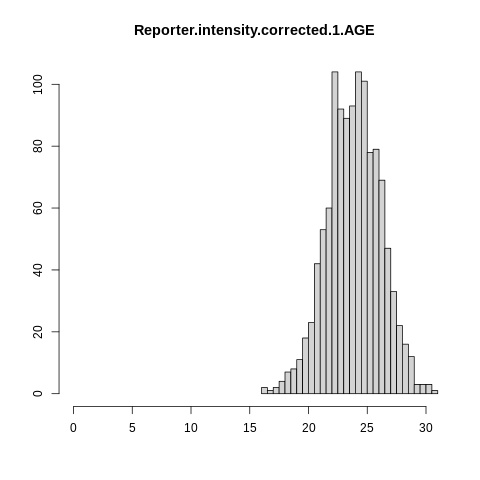

Checkbox(value=False, description='Reporter.intensity.corrected.2.AGE', indent=False)

Text(value='', description='condition', layout=Layout(height='30px', width='35%'))

Text(value='', description='replicate', layout=Layout(height='30px', width='35%'))

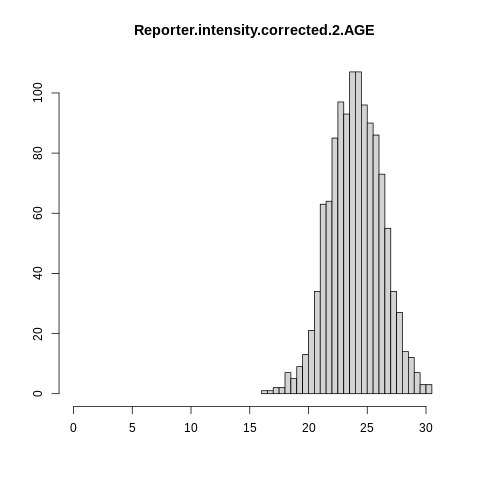

Checkbox(value=False, description='Reporter.intensity.corrected.3.AGE', indent=False)

Text(value='', description='condition', layout=Layout(height='30px', width='35%'))

Text(value='', description='replicate', layout=Layout(height='30px', width='35%'))

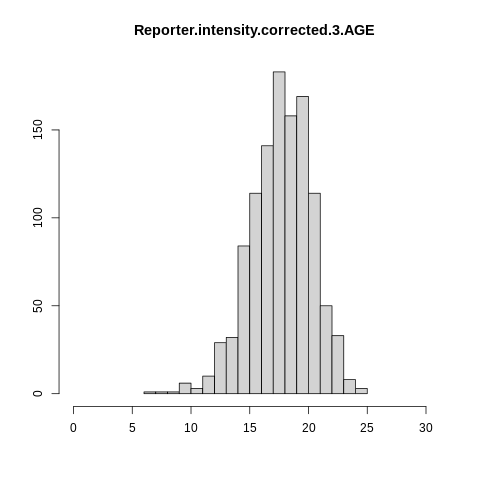

Checkbox(value=False, description='Reporter.intensity.corrected.4.AGE', indent=False)

Text(value='', description='condition', layout=Layout(height='30px', width='35%'))

Text(value='', description='replicate', layout=Layout(height='30px', width='35%'))

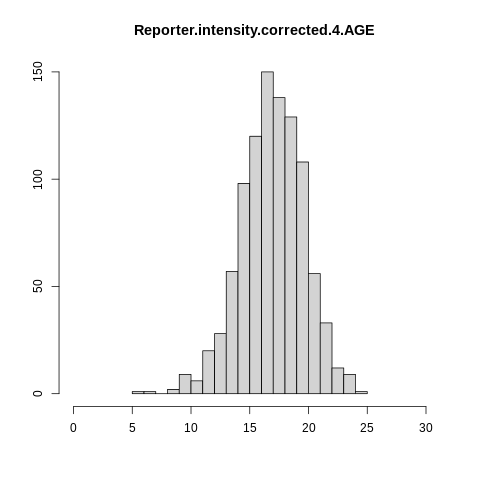

Checkbox(value=False, description='Reporter.intensity.corrected.5.AGE', indent=False)

Text(value='', description='condition', layout=Layout(height='30px', width='35%'))

Text(value='', description='replicate', layout=Layout(height='30px', width='35%'))

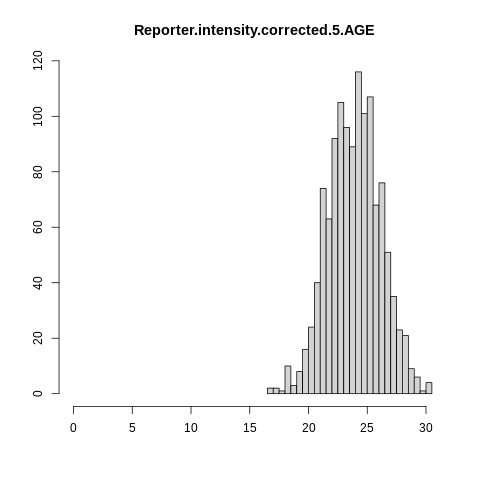

Checkbox(value=False, description='Reporter.intensity.corrected.6.AGE', indent=False)

Text(value='', description='condition', layout=Layout(height='30px', width='35%'))

Text(value='', description='replicate', layout=Layout(height='30px', width='35%'))

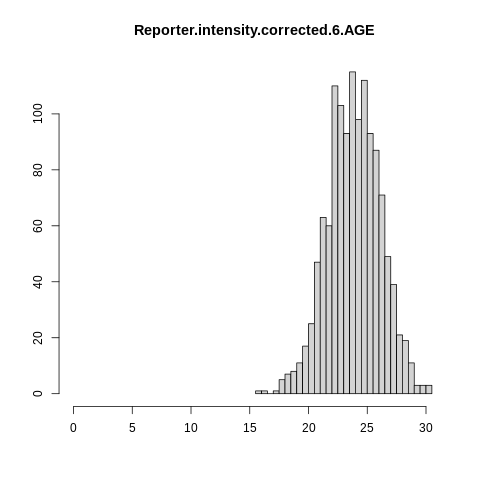

Checkbox(value=False, description='Reporter.intensity.corrected.7.AGE', indent=False)

Text(value='', description='condition', layout=Layout(height='30px', width='35%'))

Text(value='', description='replicate', layout=Layout(height='30px', width='35%'))

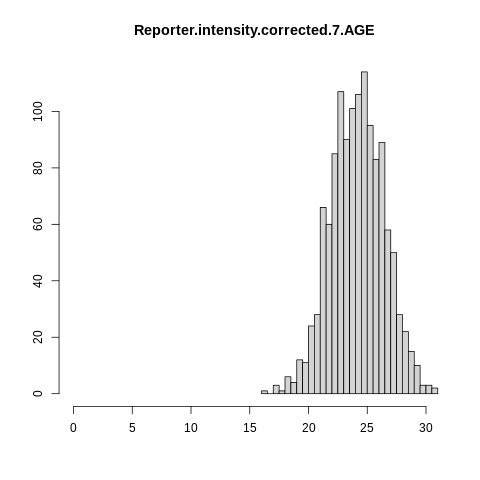

Checkbox(value=False, description='Reporter.intensity.corrected.8.AGE', indent=False)

Text(value='', description='condition', layout=Layout(height='30px', width='35%'))

Text(value='', description='replicate', layout=Layout(height='30px', width='35%'))

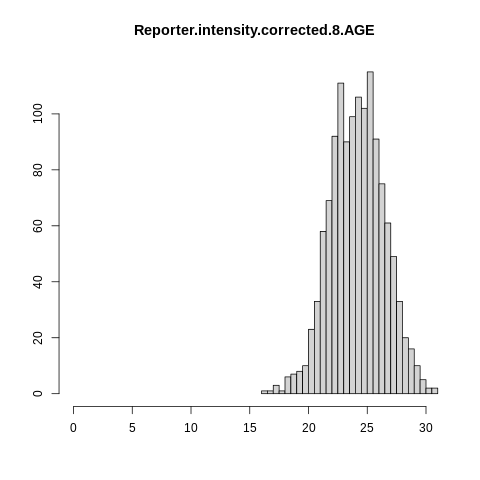

Checkbox(value=False, description='Reporter.intensity.corrected.9.AGE', indent=False)

Text(value='', description='condition', layout=Layout(height='30px', width='35%'))

Text(value='', description='replicate', layout=Layout(height='30px', width='35%'))

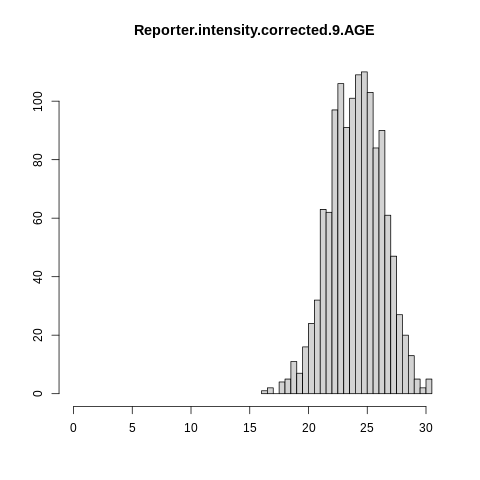

Checkbox(value=False, description='Reporter.intensity.corrected.10.AGE', indent=False)

Text(value='', description='condition', layout=Layout(height='30px', width='35%'))

Text(value='', description='replicate', layout=Layout(height='30px', width='35%'))

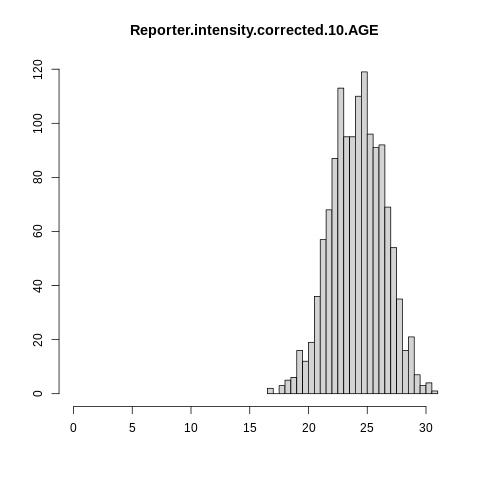

Checkbox(value=False, description='Reporter.intensity.corrected.11.AGE', indent=False)

Text(value='', description='condition', layout=Layout(height='30px', width='35%'))

Text(value='', description='replicate', layout=Layout(height='30px', width='35%'))

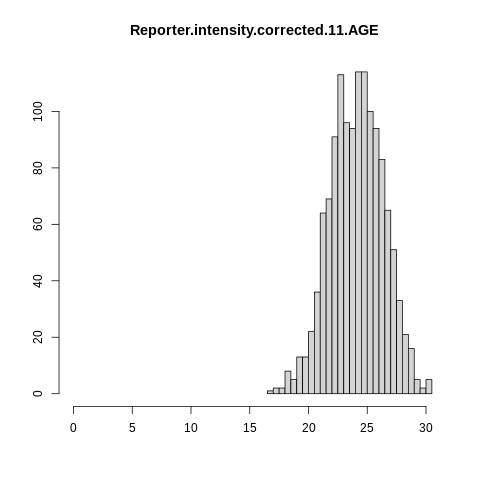

Button(description='OK', style=ButtonStyle())

Output()

In [90]:
import pandas as pd
df_colname_py = robjects.r('colname')
df_ncol_py = robjects.r('numColname')
experimental_design = pd.DataFrame(columns=['state','label','condition','replicate'], index=range(10)).fillna("False")


for i in range(0,df_ncol_py[0]):  
  generate_checkbox(df_colname_py[i], i+1)
  generate_text(i+1,"condition")
  generate_text(i+1,"replicate")
  r.assign('id', i+1) #將檔案名稱python -> R
  %R draw_hist(id)

generate_button(0, "OK")

#make se

In [109]:
%%R
# Are there any duplicated gene names?
cat('Are there any duplicated gene names? ', data$Gene.names %>% duplicated() %>% any(), "\n")

if ( data$Gene.names %>% duplicated() %>% any() ){
   # Make a table of duplicated gene names
  print(data %>% group_by(Gene.names) %>% summarize(frequency = n()) %>% 
    arrange(desc(frequency)) %>% filter(frequency > 1))
  
  
}
# Make unique names using the annotation in the "Gene.names" column as primary names and the annotation in "Protein.IDs" as name for those that do not have an gene name.
data_unique <- make_unique(data, "Gene.names", "Protein.IDs", delim = ";")


Are there any duplicated gene names?  TRUE 
# A tibble: 12 × 2
   Gene.names frequency
   <chr>          <int>
 1 ""                16
 2 "Arhgap17"         2
 3 "Hist1h4b"         2
 4 "Hnrnpa3"          2
 5 "Ikbip"            2
 6 "Pkm"              2
 7 "Plec"             2
 8 "Rtn4"             2
 9 "Serbp1"           2
10 "Tpm1"             2
11 "Tpm3"             2
12 "Tubb5"            2


In [110]:
%%R
# Generate a SummarizedExperiment object using an experimental design
LFQ_columns <- grep("Reporter.intensity.corrected.", colnames(data_unique)) # get LFQ column numbers

#experimental_design <- UbiLength_ExpDesign
experimental_design <- read.csv('/content/experimental_design.csv',header=TRUE ,fileEncoding ="UTF-8")
experimental_design$label = gsub(" ", ".", experimental_design$label)

data_se <- make_se(data_unique, LFQ_columns, experimental_design)
# Generate a SummarizedExperiment object by parsing condition information from the column names
LFQ_columns <- grep("Reporter.intensity.corrected.", colnames(data_unique)) # get LFQ column numbers
data_se_parsed <- make_se_parse(data_unique, LFQ_columns)

# Let's have a look at the SummarizedExperiment object
data_se

class: SummarizedExperiment 
dim: 2230 9 
metadata(0):
assays(1): ''
rownames(2230): A0A0G2JTR4 A0A0G2JV04 ... Gsto1 Pard3
rowData names(102): Protein.IDs Majority.protein.IDs ... name ID
colnames(9): LA_1 LA_2 ... ABC_2 ABC_3
colData names(5): state label ID condition replicate


#10 Filter on missing values 

In [111]:
%%R
plot_frequency(data_se, plot= FALSE)

  samples proteins
1       0      918
2       2       29
3       4       20
4       6       35
5       7       47
6       8      123
7       9     1058


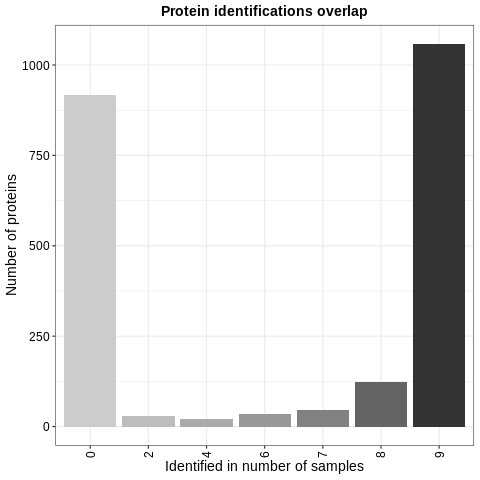

In [112]:
%%R
# Plot a barplot of the protein identification overlap between samples
pic10_1 <- plot_frequency(data_se, plot= TRUE)
print(pic10_1)

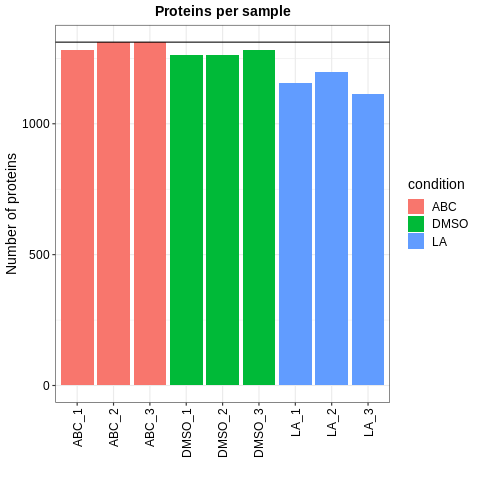

In [114]:
%%R
# Filter for proteins that are identified in all replicates of at least one condition
data_filt <- filter_missval(data_se, thr = 2) #讓使用者選0~4(重複)

# Less stringent filtering:
# Filter for proteins that are identified in 2 out of 3 replicates of at least one condition
data_filt2 <- filter_missval(data_se, thr = 1)

# Plot a barplot of the number of identified proteins per samples
pic10_2 <- plot_numbers(data_filt, plot=TRUE)
print(pic10_2)

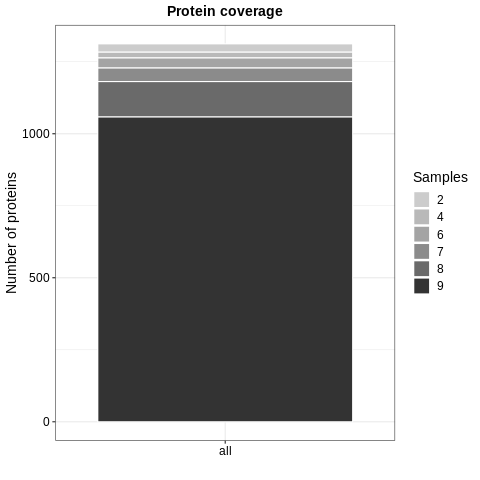

In [115]:
%%R
# Plot a barplot of the protein identification overlap between samples
pic10_3 <- plot_coverage(data_filt)
print(pic10_3)

#11 Normalization 

In [116]:
%%R
# Normalize the data
data_norm <- normalize_vsn(data_filt)

R[write to console]: vsn2: 1312 x 9 matrix (1 stratum). 

R[write to console]: Please use 'meanSdPlot' to verify the fit.



R[write to console]: vsn2: 1312 x 9 matrix (1 stratum). 

R[write to console]: Please use 'meanSdPlot' to verify the fit.



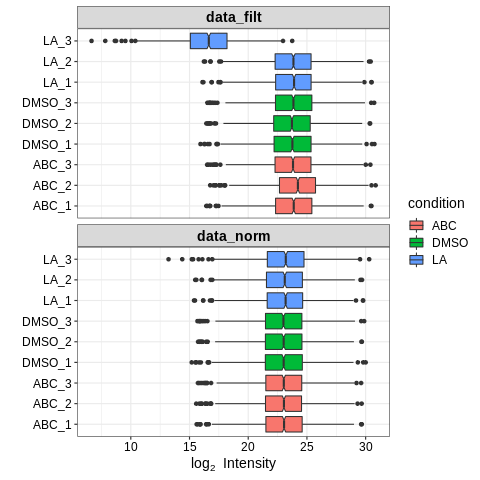

In [117]:
%%R
# Normalize the data
data_norm <- normalize_vsn(data_filt)

# Visualize normalization by boxplots for all samples before and after normalization
pic11_1 <- plot_normalization(data_filt, data_norm)
print(pic11_1)

#12 Impute data for missing values 

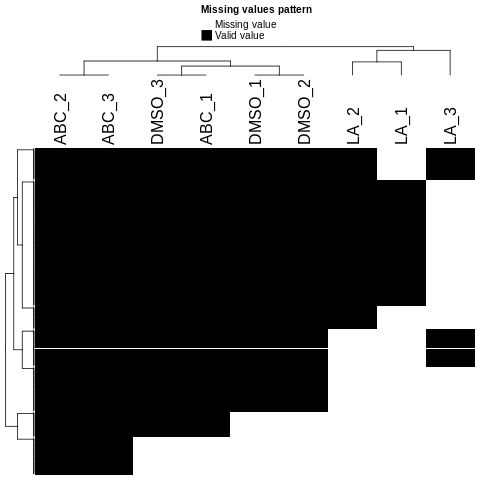

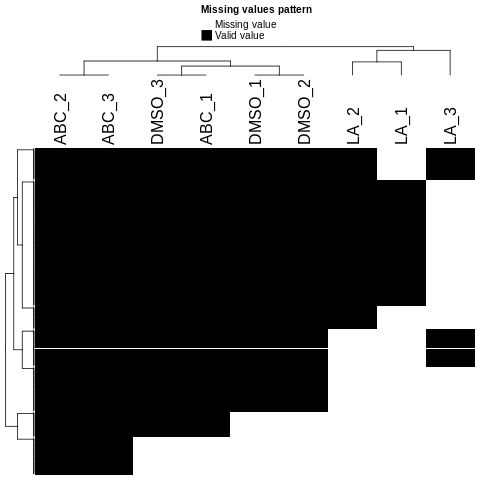

In [118]:
%%R
# Plot a heatmap of proteins with missing values
pic12_1 <- plot_missval(data_filt)
print(pic12_1)

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]


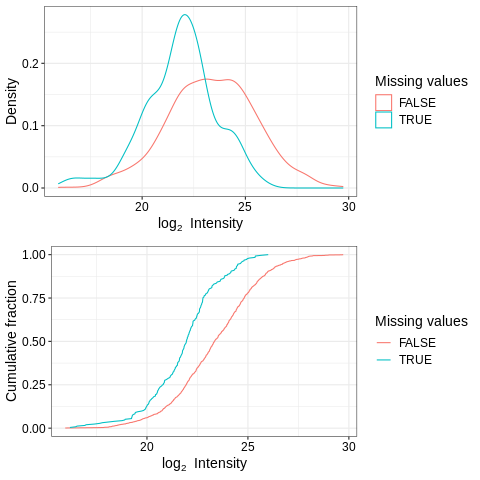

In [119]:
%%R
# Plot intensity distributions and cumulative fraction of proteins with and without missing values
pic12_2 <- plot_detect(data_filt)
print(pic12_2)

[1] 0.3099361


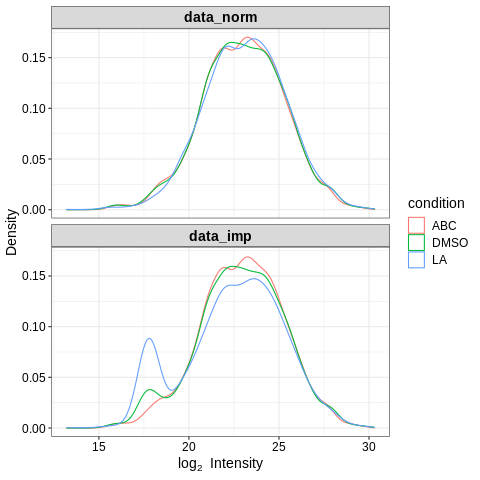

In [120]:
%%R
# All possible imputation methods are printed in an error, if an invalid function name is given.
#impute(data_norm, fun = "")

# Impute missing data using random draws from a Gaussian distribution centered around a minimal value (for MNAR)
data_imp <- impute(data_norm, fun = "MinProb", q = 0.01)

# Impute missing data using random draws from a manually defined left-shifted Gaussian distribution (for MNAR)
data_imp_man <- impute(data_norm, fun = "man", shift = 1.8, scale = 0.3)

# Impute missing data using the k-nearest neighbour approach (for MAR)
data_imp_knn <- impute(data_norm, fun = "knn", rowmax = 0.9)

# Plot intensity distributions before and after imputation
pic12_3 <- plot_imputation(data_norm, data_imp)
print(pic12_3)

In [121]:
%%R
# Differential enrichment analysis  based on linear models and empherical Bayes statistics

# Test every sample versus control
data_diff <- test_diff(data_imp, type = "control", control = "LA") #LA:要讓使用者可以輸入


R[write to console]: Tested contrasts: DMSO_vs_LA, ABC_vs_LA



In [122]:
%%R
# Denote significant proteins based on user defined cutoffs
dep <- add_rejections(data_diff, alpha = 1, lfc = log2(1.5)) #alpha、lfc調整
head(dep)
typeof(dep)
colnames(dep)

[1] "LA_1"   "LA_2"   "LA_3"   "DMSO_1" "DMSO_2" "DMSO_3" "ABC_1"  "ABC_2" 
[9] "ABC_3" 


#13 PCA plot   

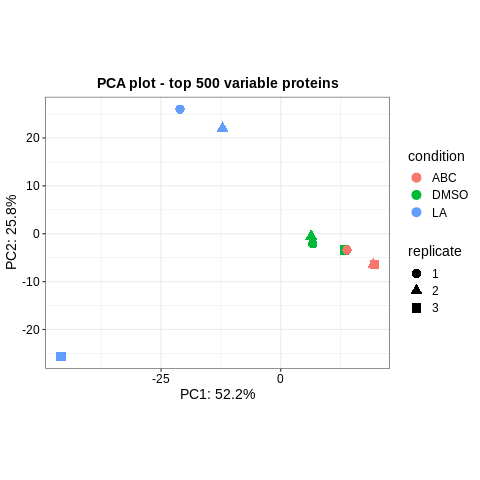

In [123]:
%%R
pic13_1 <- plot_pca(dep, x = 1, y = 2, n = 500, point_size = 4)
print(pic13_1)

#14 Correlation matrix 

In [124]:
%%R
colnames(dep)
head(dep)


class: SummarizedExperiment 
dim: 6 9 
metadata(0):
assays(1): ''
rownames(6): A0A0G2JTR4 A0A0G2JV04 ... Aacs Aak1
rowData names(117): name Protein.IDs ... DMSO_vs_LA_significant
  significant
colnames(9): LA_1 LA_2 ... ABC_2 ABC_3
colData names(5): state label ID condition replicate


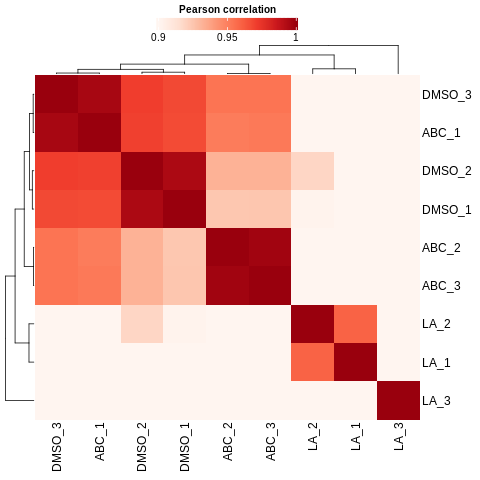

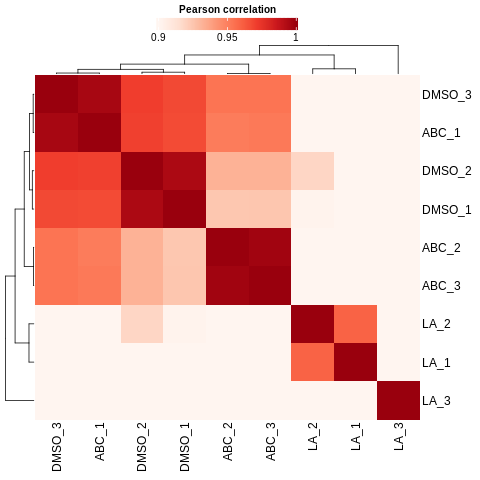

In [125]:
%%R
# Plot the Pearson correlation matrix
pic14_1 <- plot_cor(dep, significant = FALSE, lower = 0.9, upper = 1, pal = "Reds")
print(pic14_1)

#15 Heatmap of all significant proteins

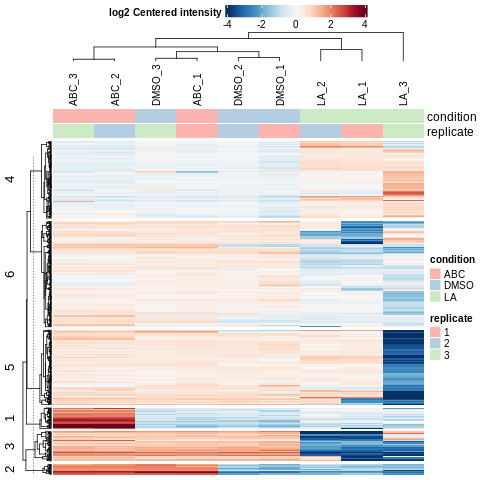

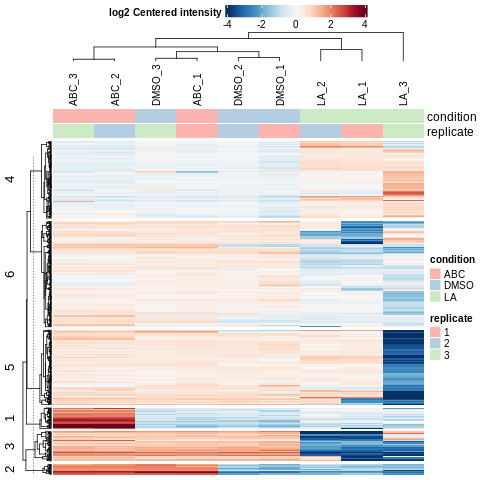

In [126]:
%%R
# Plot a heatmap of all significant proteins with the data centered per protein
pic15_1 <- plot_heatmap(dep, type = "centered", kmeans = TRUE, 
             k = 6, col_limit = 4, show_row_names = FALSE,
             indicate = c("condition", "replicate"))
print(pic15_1)

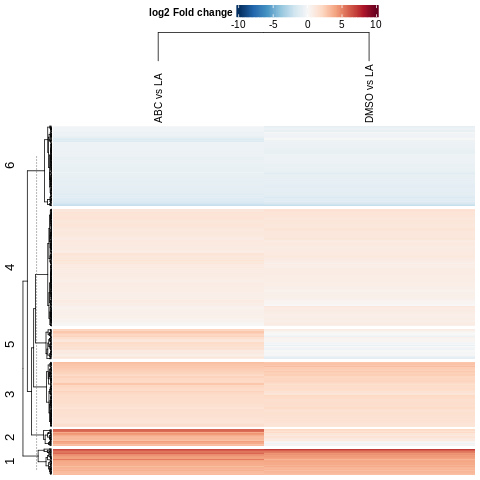

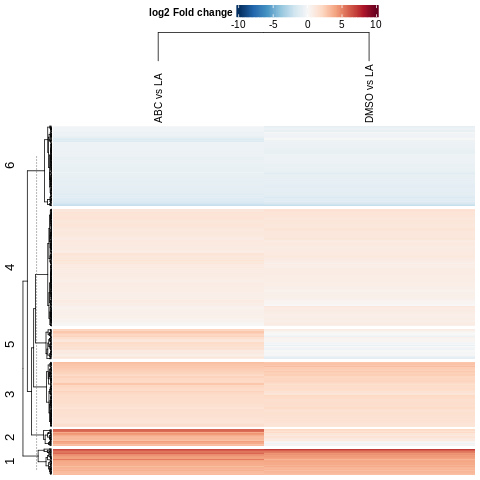

In [127]:
%%R
# Plot a heatmap of all significant proteins (rows) and the tested contrasts (columns)
pic15_2 <- plot_heatmap(dep, type = "contrast", kmeans = TRUE, 
             k = 6, col_limit = 10, show_row_names = FALSE)
print(pic15_2)

#16 Volcano plots of specific cotrasts 

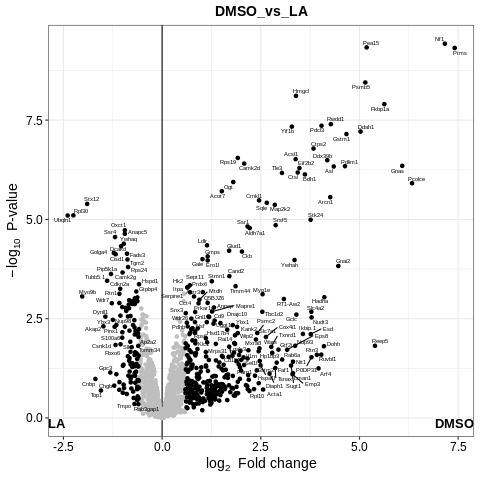

In [128]:
%%R
# Plot a volcano plot for the contrast "Ubi6 vs Ctrl""
pic16_1 <- plot_volcano(dep, contrast = "DMSO_vs_LA", label_size = 2, add_names = TRUE) #變數
print(pic16_1)

#17 Barplots of a protein of interest 

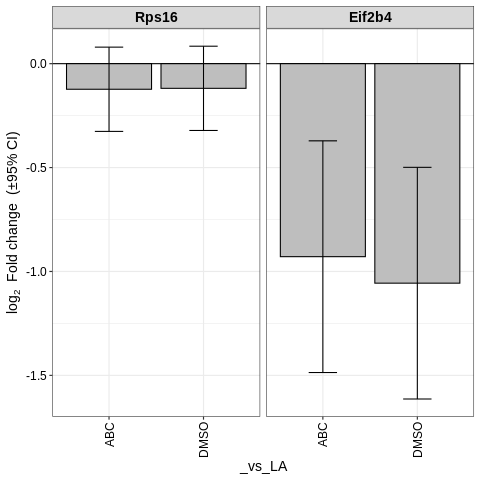

In [129]:
%%R
# Plot a barplot for USP15 and IKBKG
pic17_1 <- plot_single(dep, proteins = c("Rps16", "Eif2b4"))  #Rps16 Eif2b4要給使用者輸入  #	proteins: Character, The name(s) of the protein(s) to plot.
print(pic17_1)                            #給使用輸幾個

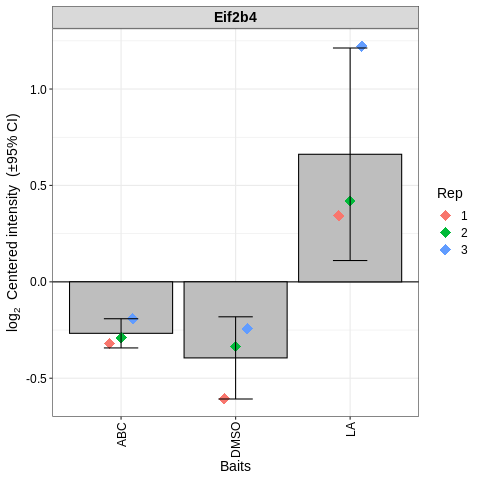

In [130]:
%%R
# Plot a barplot for the protein USP15 with the data centered
pic17_2 <- plot_single(dep, proteins = "Eif2b4", type = "centered") #要給使用者輸入
print(pic17_2)

#18 Frequency plot of significant proteins and overlap of conditions 



 

TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name            grob
1 1 (1-1,1-1) arrange  gtable[layout]
2 2 (1-1,2-2) arrange gtable[core-fg]


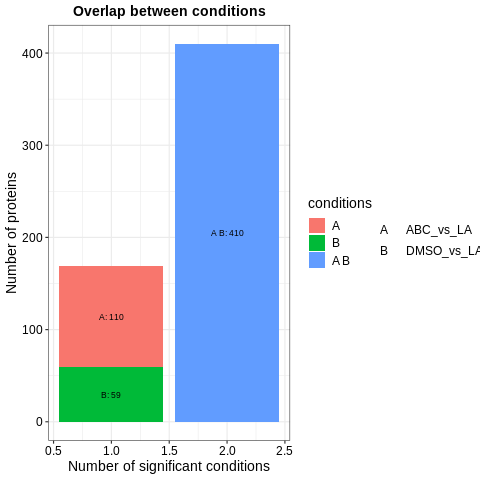

In [131]:
%%R
# Plot a frequency plot of significant proteins for the different conditions
pic18_1 <- plot_cond(dep)
print(pic18_1)

In [132]:
%%R
# Generate a results table
data_results <- get_results(dep)

# Number of significant proteins
data_results %>% filter(significant) %>% nrow()

[1] 579


In [133]:
%%R
# Column names of the results table
colnames(data_results)

 [1] "name"                   "ID"                     "ABC_vs_LA_p.val"       
 [4] "DMSO_vs_LA_p.val"       "ABC_vs_LA_p.adj"        "DMSO_vs_LA_p.adj"      
 [7] "ABC_vs_LA_significant"  "DMSO_vs_LA_significant" "significant"           
[10] "ABC_vs_LA_ratio"        "DMSO_vs_LA_ratio"       "ABC_centered"          
[13] "DMSO_centered"          "LA_centered"           


In [134]:
%%R
write.csv(data_results,"dep_output.csv", row.names = FALSE, quote=F)